
<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Reading external data & Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [2]:
df = pd.read_csv('freecodecamp-intro-to-pandas-master/freecodecamp-intro-to-pandas-master/data/btc-market-price.csv')
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [3]:
df.columns = ['Timestamp','Price']
df.head()

,Timestamp,Price
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [4]:
"To show the last three rows of the dataframe"
df.tail(3)

,Timestamp,Price
361,2018-03-30 00:00:00,6882.531667
362,2018-03-31 00:00:00,6935.480000
363,2018-04-01 00:00:00,6794.105000


We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [5]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-03
1   2017-04-04
2   2017-04-05
3   2017-04-06
4   2017-04-07
Name: Timestamp, dtype: datetime64[ns]

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Price
0,2017-04-03,1141.813000
1,2017-04-04,1141.600363
2,2017-04-05,1133.079314
3,2017-04-06,1196.307937
4,2017-04-07,1190.454250


In [7]:
df.set_index('Timestamp', inplace=True)

In [8]:
df.head()

,Price
Timestamp,
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
2017-04-07,1190.454250


In [9]:
"We can pull out specfic queries"
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Putting everything together
And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [11]:
df = pd.read_csv('freecodecamp-intro-to-pandas-master/freecodecamp-intro-to-pandas-master/data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [12]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [14]:
df = pd.read_csv(
    'freecodecamp-intro-to-pandas-master/freecodecamp-intro-to-pandas-master/data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [15]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


### Plotting
`pandas` integrates with Matplotlib and creating a plot is as simple as:

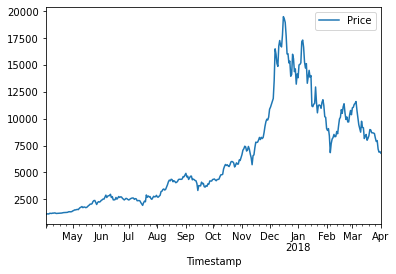

In [16]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

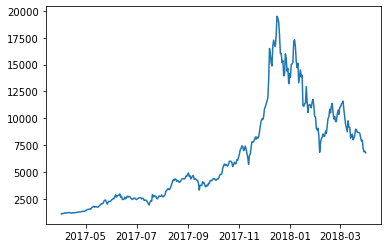

In [18]:
plt.plot(df.index, df['Price'])

In [19]:
x = np.arange(-10, 11)

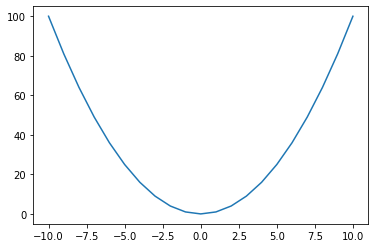

In [20]:
plt.plot(x, x ** 2)

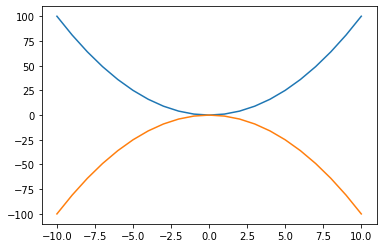

In [21]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0.5, 1.0, 'My Nice Plot')

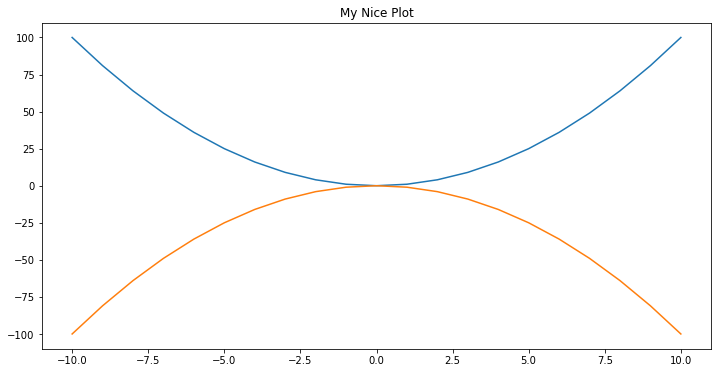

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

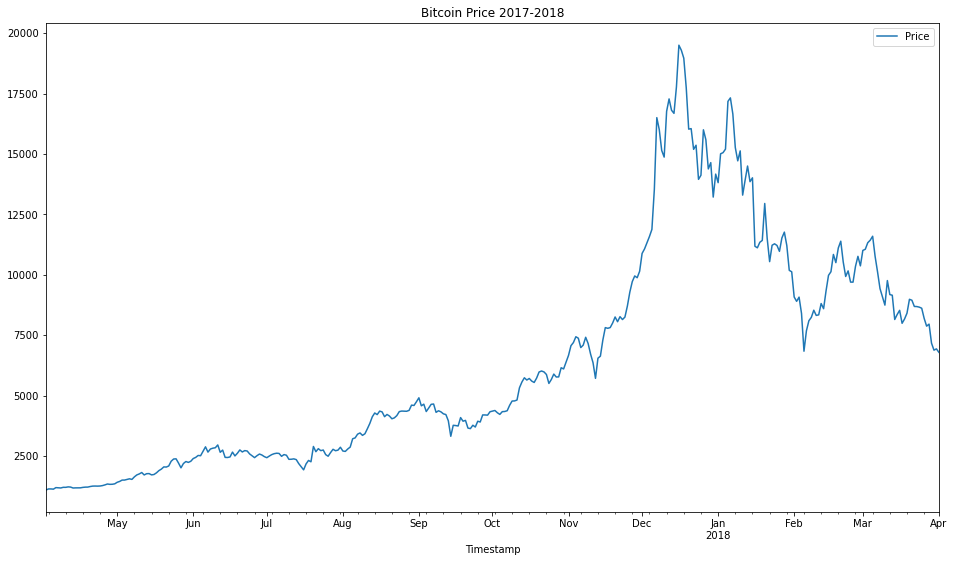

In [23]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')